## K-nearest neighbors algorithm 
K近邻算法(KNN)是一种用于分类和回归的非参数化方法。  
在KNN分类中，输出是一个类成员。一个对象被它的邻居的按多数选票分类，对象被分配给它k个最近邻中最常见的类。如果k = 1，那么这个对象就被简单地分配给那个最近邻居的类。

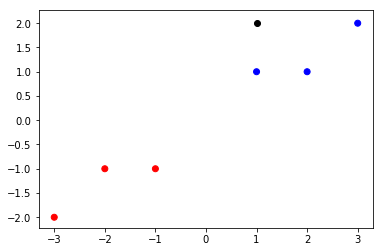

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# Create a dataset
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
x0 = np.array([1, 2])

# Scatter plot
colors = ['blue' if yi else 'red' for yi in y]
plt.scatter(*X.T, color=colors)
plt.scatter(*x0, color='black')
plt.show()

## KNN的简单实现

  
快速排序算法步骤：
1. 选取一个数字作为基准，可选取末位数字
2. 将数列第一位开始，依次与此数字比较，如果小于此数，将小数交换到左边，最后达到小于基准数的在左边，大于基准数的在右边，分为两个数组
3. 分别对两个数组重复上述步骤


In [70]:
def quick_sort(A, left, right, key):
    if left < right:
        # step 1
        x = A[right]

        # step 2
        div_index = left
        for i in range(left, right):
            if key(A[i]) < key(x):
                A[div_index], A[i] = A[i], A[div_index]
                div_index += 1
        A[div_index], A[right] = A[right], A[div_index]

        # step 3
        quick_sort(A, left, div_index - 1, key)
        quick_sort(A, div_index, right, key)
    else:
        return None


KNN算法步骤：  
1. 计算已知类别数据集中的点与当前点之间的距离；
2. 按照距离递增次序排序；
3. 选取与当前点距离最小的k个点；
4. 确定k个点所在类别的出现频率；

In [71]:
def simple_knn(x0, X, y, k=2):
    # step1
    m = len(y)
    distances = np.empty(m, dtype=np.float32)
    for i, xi in enumerate(X):
        distance = 0.0
        for x0j, xij in zip(x0, xi):
            distance += (x0j - xij) ** 2
        distances[i] = distance ** 0.5

    # step2
    neighbors_idx = np.arange(m)
    quick_sort(neighbors_idx, 0, m-1, lambda x: distances[x])
    
    # step3
    knn_idx = neighbors_idx[:k]
    
    # step4
    dic = {}
    for i in knn_idx:
        if y[i] in dic:
            dic[y[i]] += 1
        else:
            dic[y[i]] = 1
    
    return max(dic)


In [72]:
from scipy.stats import mode
def simple_knn1(x0, X, y, k=2):
    return mode(y[(np.sum((X - x0) ** 2, axis=1) ** 0.5).argsort()[:k]])[0]

In [73]:
print("y0 is %d" % simple_knn(x0, X, y, k=3))
print("y0 is %d" % simple_knn1(x0, X, y, k=3))

y0 is 1
y0 is 1


##  k-d树
k-d树（k-dimensional树的简称），是一种分割k维数据空间的数据结构。主要应用于多维空间关键数据的搜索（如：范围搜索和最近邻搜索）。主要包含如下数据结构：  
1. Node-data：数据集中某个数据点，是n维矢量（这里也就是k维）
2. Range：该节点所代表的空间范围
3. split：垂直于分割超平面的方向轴序号
4. Left：由位于该节点分割超平面左子空间内所有数据点所构成的k-d树
5. Right：由位于该节点分割超平面右子空间内所有数据点所构成的k-d树
6. parent：父节点

## k-d树算法步骤
1. 确定split域：对于所有描述子数据（特征矢量），统计它们在每个维上的数据方差。挑选出最大值，对应的维就是split域的值。数据方差大表明沿该坐标轴方向上的数据分散得比较开，在这个方向上进行数据分割有较好的分辨率；
2. 确定Node-data域：数据点集Data-set按其第split域的值排序。位于正中间的那个数据点被选为Node-data。此时新的Data-set要除去其中Node-data这一点
3. 确定左子空间和右子空间。

In [ ]:
class Node(object):
    def __init__(self, val, split, left, right):
        self.val = val
        self.rng = 
        self.split = split
        self.left = left
        self.right = right

In [ ]:
class KdTree(object):
    def __init__(self, X):
        k = data.shape[1]
    
    def CreateNode(split, X): 
        if not X:
            return None
        data_set.sort(key=lambda x: x[split])
        split_pos = len(data_set) // 2
        median = data_set[split_pos]        
        split_next = (split + 1) % k

        # 递归的创建kd树
        return KdNode(median, split, 
                      CreateNode(split_next, data_set[:split_pos]),     # 创建左子树
                      CreateNode(split_next, data_set[split_pos + 1:])) # 创建右子树
                                
        self.root = CreateNode(0, data)         # 从第0维分量开始构建kd树,返回根节点